In [1]:
#library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#membaca data dan meilhat apakah ada missing value
data = pd.read_csv("dataBersih.csv")
data.isnull().sum()


age                    0
sex                    0
on_thyroxine           0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH                    0
TT4                    0
T4U                    0
FTI                    0
target                 0
dtype: int64

In [3]:
#membagi dataset menjadi x (fitur) dan y (target)
x = data.drop('target', axis=1)
y = data['target']

In [4]:
#membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1097
           1       0.54      0.41      0.47        17
           2       0.99      0.96      0.97        98

    accuracy                           0.98      1212
   macro avg       0.84      0.79      0.81      1212
weighted avg       0.98      0.98      0.98      1212



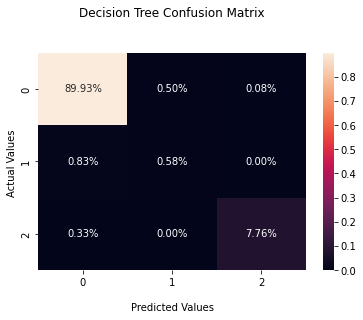

In [5]:
#pemodelan data dengan Decision Tree
classifier = DecisionTreeClassifier()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

cf = confusion_matrix(y_test, y_pred)
confusion_matrix = sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%')
confusion_matrix.set_title('Decision Tree Confusion Matrix\n\n');
confusion_matrix.set_xlabel('\nPredicted Values')
confusion_matrix.set_ylabel('Actual Values ');

In [6]:
#akurasi dari data latih dan uji 
acc = (classifier.score(x_train , y_train)*100)
print(f'Akurasi Data Latih {acc:.2f}')

acc =(classifier.score(x_test , y_test)*100)
print(f'Akurasi Data Uji {acc:.2f}')

Akurasi Data Latih 100.00
Akurasi Data Uji 98.27


Fitur: age, Nilai Kontribusi: 0.026196829114221113
Fitur: sex, Nilai Kontribusi: 0.00433164345254737
Fitur: on_thyroxine, Nilai Kontribusi: 0.006954133950141771
Fitur: on_antithyroid_meds, Nilai Kontribusi: 0.0037554820317270404
Fitur: sick, Nilai Kontribusi: 0.001575306732879487
Fitur: pregnant, Nilai Kontribusi: 0.00025141811527623425
Fitur: thyroid_surgery, Nilai Kontribusi: 0.007856597505018808
Fitur: I131_treatment, Nilai Kontribusi: 0.0010589883287509185
Fitur: query_hypothyroid, Nilai Kontribusi: 0.0027780453241430633
Fitur: query_hyperthyroid, Nilai Kontribusi: 0.0064068784269622975
Fitur: lithium, Nilai Kontribusi: 0.0005838526378265646
Fitur: goitre, Nilai Kontribusi: 0.0003795992202387923
Fitur: tumor, Nilai Kontribusi: 0.0037011128501332584
Fitur: hypopituitary, Nilai Kontribusi: 0.0
Fitur: psych, Nilai Kontribusi: 0.0007511593070737841
Fitur: TSH, Nilai Kontribusi: 0.6825897714788611
Fitur: TT4, Nilai Kontribusi: 0.09123432339476836
Fitur: T4U, Nilai Kontribusi: 0.03750597

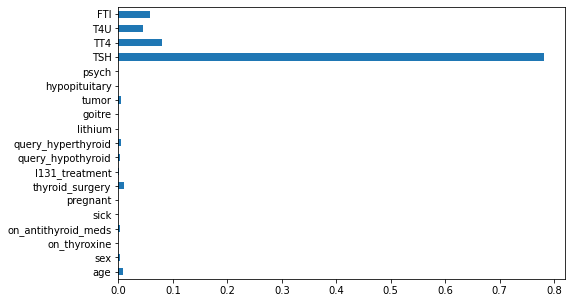

In [7]:
#grafik nilai kontribusi dari tiap fitur
column_names = ["age", "sex", "on_thyroxine", "on_antithyroid_meds", "sick", "pregnant", "thyroid_surgery", "I131_treatment", "query_hypothyroid", "query_hyperthyroid", "lithium", "goitre", "tumor", "hypopituitary", "psych", "TSH", "TT4", "T4U", "FTI"]

a = (pd.Series(classifier.feature_importances_, index=column_names))
g = a.plot(kind='barh', figsize=(8, 5))

from sklearn.ensemble import RandomForestClassifier

#Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=0)

#melatih model 
model.fit(x, y)

#nilai kontribusi fitur
feature_importances = model.feature_importances_
for feature_name, importance in zip(x.columns, feature_importances):
    print(f"Fitur: {feature_name}, Nilai Kontribusi: {importance}")



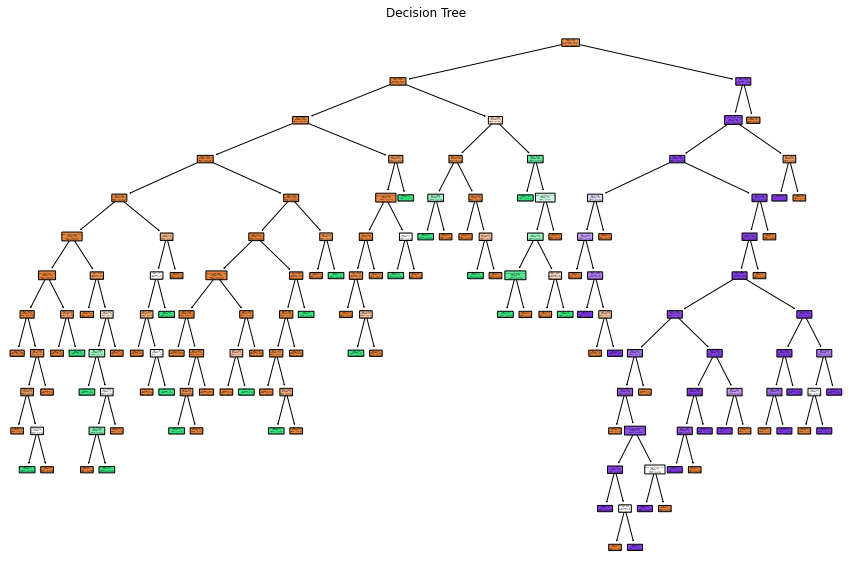

In [8]:
#visualisasi Decision Tree
feature_names = list(x.columns)
plt.figure(figsize=(15, 10))
plot_tree(classifier, filled=True, feature_names=feature_names, class_names=['Negative', 'Hyperthyroid', 'Hypothyroid'], rounded=True)
plt.title("Decision Tree")
plt.show()

In [9]:
#akurasi data latih dan uji
acc = (classifier.score(x_train , y_train)*100)
print(f'Akurasi Data Latih {acc:.2f}')

acc =(classifier.score(x_test , y_test)*100)
print(f'Akurasi Data Uji {acc:.2f}')

Akurasi Data Latih 100.00
Akurasi Data Uji 98.27


In [10]:
#memprediksi hasil data uji
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

Text(0.5, 1.0, 'Confusion Matrix Decision Tree')

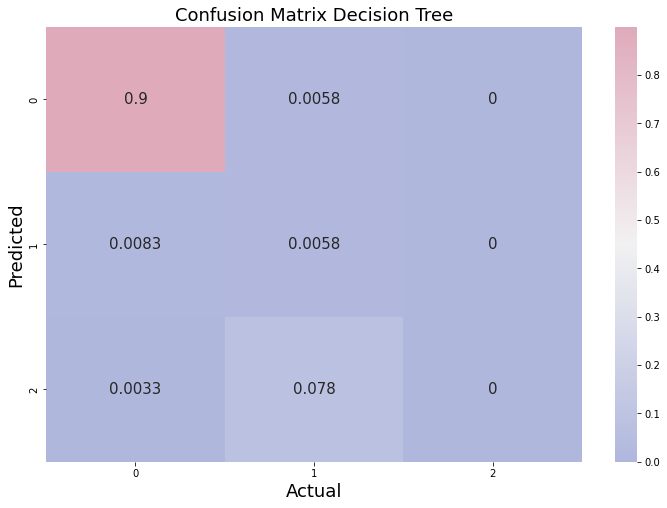

In [11]:
# confusion matrix

from sklearn.metrics import confusion_matrix

cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})
plt.ylabel('Predicted', fontsize=18)
plt.xlabel('Actual', fontsize=18)
plt.title('Confusion Matrix Decision Tree', fontsize=18)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1097
           1       0.06      0.41      0.11        17
           2       0.00      0.00      0.00        98

    accuracy                           0.91      1212
   macro avg       0.35      0.47      0.37      1212
weighted avg       0.89      0.91      0.90      1212



c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
